In [1]:
import numpy as np
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules


import pandas as pd 
df=pd.read_csv("online_food_transactions.csv")
print(df.head())

   TID                                 Items
0    1         Idli,Ice Cream,Samosa,Paratha
1    2    Pizza,Fries,Coke,Tea,Juice,Biryani
2    3          Burger,Biryani,Samosa,Paneer
3    4  Pepsi,Tea,Sandwich,Pizza,Dosa,Burger
4    5                     Pepsi,Coffee,Coke


In [3]:
transactions=df['Items'].apply(lambda x: x.split(",")).tolist()
print(transactions)

[['Idli', 'Ice Cream', 'Samosa', 'Paratha'], ['Pizza', 'Fries', 'Coke', 'Tea', 'Juice', 'Biryani'], ['Burger', 'Biryani', 'Samosa', 'Paneer'], ['Pepsi', 'Tea', 'Sandwich', 'Pizza', 'Dosa', 'Burger'], ['Pepsi', 'Coffee', 'Coke'], ['Pasta', 'Salad', 'Coffee', 'Paratha', 'Juice', 'Biryani'], ['Biryani', 'Noodles', 'Pizza', 'Paneer'], ['Sandwich', 'Biryani', 'Coffee', 'Juice'], ['Salad', 'Biryani', 'Pepsi', 'Idli'], ['Coke', 'Fries', 'Biryani'], ['Pizza', 'Pasta', 'Paneer'], ['Pizza', 'Pasta', 'Biryani', 'Paneer', 'Coke'], ['Idli', 'Ice Cream', 'Noodles', 'Pizza'], ['Tea', 'Idli', 'Coffee', 'Coke', 'Cake'], ['Biryani', 'Coke', 'Coffee', 'Paratha', 'Samosa', 'Burger'], ['Pasta', 'Juice', 'Dosa', 'Idli'], ['Salad', 'Fries', 'Paneer', 'Noodles'], ['Paratha', 'Juice', 'Samosa', 'Tea', 'Sandwich', 'Pizza'], ['Cake', 'Pizza', 'Juice', 'Tea'], ['Coffee', 'Pizza', 'Paneer'], ['Salad', 'Fries', 'Samosa', 'Cake', 'Pasta', 'Tea'], ['Idli', 'Fries', 'Cake'], ['Pizza', 'Pepsi', 'Biryani'], ['Coffee', '

In [4]:
from mlxtend.preprocessing import TransactionEncoder
te=TransactionEncoder()
te_array=te.fit(transactions).transform(transactions)
df_encoded=pd.DataFrame(te_array, columns=te.columns_)

In [5]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets=apriori(df_encoded,min_support=0.01,use_colnames=True)
print("Total Frequent Itemsets:",frequent_itemsets.shape[0])

Total Frequent Itemsets: 881


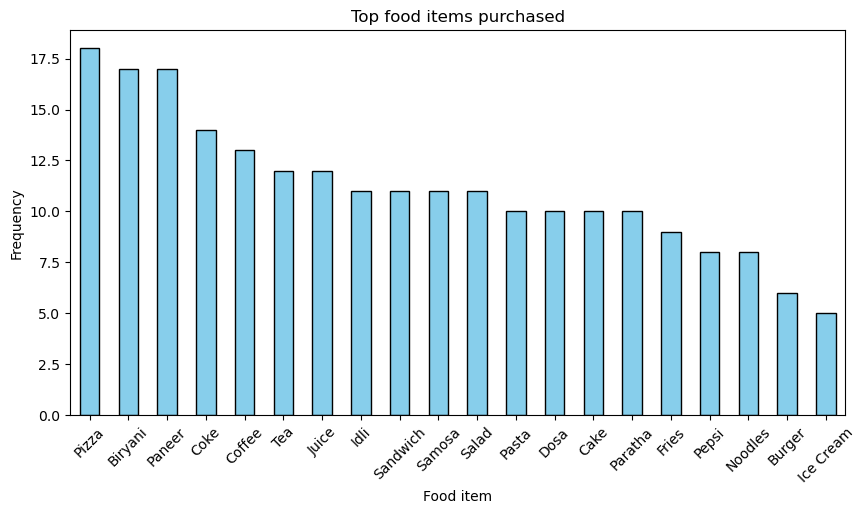

In [9]:
all_items=[item for sublist in transactions for item in sublist]
item_counts=pd.Series(all_items).value_counts()
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
item_counts.plot(kind='bar',color='skyblue',edgecolor='black')
plt.title("Top food items purchased")
plt.xlabel("Food item")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.show()

In [10]:
from mlxtend.frequent_patterns import association_rules
rules=association_rules(frequent_itemsets, metric="confidence", min_threshold=0.1)
rules=rules[rules['antecedents'].apply(lambda x: len(x)>=1) & rules['consequents'].apply(lambda x: len(x)>=1)]
print("Association Rules:",rules.shape[0])
rules[['antecedents','consequents','support','confidence','lift']].head(5)

Association Rules: 7097


,antecedents,consequents,support,confidence,lift
0,(Biryani),(Burger),0.04,0.117647,0.980392
1,(Burger),(Biryani),0.04,0.333333,0.980392
2,(Biryani),(Cake),0.04,0.117647,0.588235
3,(Cake),(Biryani),0.04,0.200000,0.588235
4,(Biryani),(Coffee),0.06,0.176471,0.678733


In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

In [12]:
df=pd.read_csv('cancer_data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [14]:
df.drop(['id','Unnamed: 32'],axis=1,inplace=True)
df['diagnosis']=df['diagnosis'].map({'M':1,'B':0})
df.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [15]:
X=df.drop('diagnosis',axis=1)
y=df['diagnosis']

In [17]:
scaler=StandardScaler()
scaled_data=scaler.fit_transform(X)
print(scaled_data[:2])

[[ 1.09706398e+00 -2.07333501e+00  1.26993369e+00  9.84374905e-01
   1.56846633e+00  3.28351467e+00  2.65287398e+00  2.53247522e+00
   2.21751501e+00  2.25574689e+00  2.48973393e+00 -5.65265059e-01
   2.83303087e+00  2.48757756e+00 -2.14001647e-01  1.31686157e+00
   7.24026158e-01  6.60819941e-01  1.14875667e+00  9.07083081e-01
   1.88668963e+00 -1.35929347e+00  2.30360062e+00  2.00123749e+00
   1.30768627e+00  2.61666502e+00  2.10952635e+00  2.29607613e+00
   2.75062224e+00  1.93701461e+00]
 [ 1.82982061e+00 -3.53632408e-01  1.68595471e+00  1.90870825e+00
  -8.26962447e-01 -4.87071673e-01 -2.38458552e-02  5.48144156e-01
   1.39236330e-03 -8.68652457e-01  4.99254601e-01 -8.76243603e-01
   2.63326966e-01  7.42401948e-01 -6.05350847e-01 -6.92926270e-01
  -4.40780058e-01  2.60162067e-01 -8.05450380e-01 -9.94437403e-02
   1.80592744e+00 -3.69203222e-01  1.53512599e+00  1.89048899e+00
  -3.75611957e-01 -4.30444219e-01 -1.46748968e-01  1.08708430e+00
  -2.43889668e-01  2.81189987e-01]]


In [18]:
pca=PCA(n_components=2)
x_pca=pca.fit_transform(scaled_data)
print(x_pca[:2])

[[ 9.19283683  1.94858307]
 [ 2.3878018  -3.76817174]]


In [20]:
print("Explained Varience:",pca.explained_variance_ratio_)
print("Cumulative:",np.cumsum(pca.explained_variance_ratio_))

Explained Varience: [0.44272026 0.18971182]
Cumulative: [0.44272026 0.63243208]
